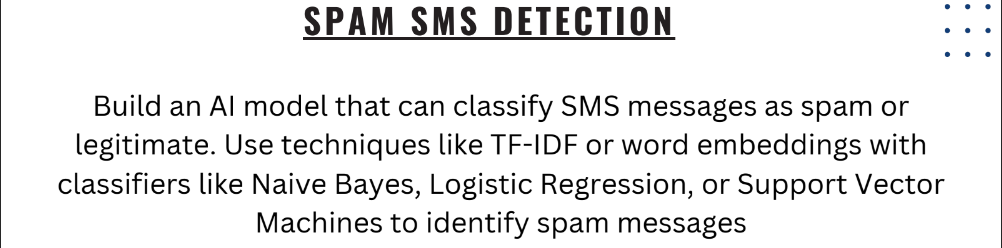

In [13]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [14]:
#read data
data = pd.read_csv(r"spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
#drop extra columns
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
data.drop(columns=columns_to_drop, inplace=True)

In [16]:
new_column_names = {"v1":"Category","v2":"Message"}
data.rename(columns = new_column_names,inplace = True)

In [17]:
data = data.where((pd.notnull(data)), ' ')

In [18]:
x = data["Message"]
y = data["Category"]

In [19]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.2, random_state = 3)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

train_x = feature_extraction.fit_transform(train_x)
test_x = feature_extraction.transform(test_x)



In [21]:
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [22]:
prediction = model.predict(train_x)
accuracy = accuracy_score(train_y, prediction)
print("Accuracy on training data:",accuracy)

Accuracy on training data: 0.9661207089970832


In [23]:
prediction1 = model.predict(test_x)
accuracy1 = accuracy_score(test_y,prediction1)
print("Accuracy on test data:",accuracy1)

Accuracy on test data: 0.9623318385650225
